In [1]:
import torch
import torchvision
from torch import nn
from torch import optim
# from torchvision.transforms import ToTensor
# import torch.nn.functional as F
import matplotlib.pyplot as plt

c:\Users\tothm\.conda\envs\ai_learn\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] A megadott eljárás nem található'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import copy

In [3]:
numb_batch = 64

In [4]:
T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
train_data = torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=T)
val_data = torchvision.datasets.MNIST('mnist_data', train=False, download=True, transform=T)

train_dl = torch.utils.data.DataLoader(train_data, batch_size = numb_batch)
val_dl = torch.utils.data.DataLoader(val_data, batch_size = numb_batch)

In [5]:
def create_model():
    model = nn.Sequential(
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5, padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(400, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )
    return model

In [6]:
def validate(model, data, device):
    total = 0
    correct = 0
    for images, labels in data:
        images = images.to(device)
        labels = labels.to(device)

        x = model(images)
        _, pred = torch.max(x, 1)
        pred = pred.cpu()  # Move predictions back to CPU if they were on GPU
        total += labels.size(0)
        correct += torch.sum(pred == labels.cpu())  # Move labels back to CPU for comparison

    return correct * 100. / total


In [7]:
def train(numb_epoch=3, lr=1e-3, device="cpu"):
    accuracies = []
    best_model = cnn = create_model().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=lr)
    max_accuracy = 0
    max_acc_epoch = 0
    for epoch in range(numb_epoch):
        for images, labels in train_dl:
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn, val_dl, device))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            max_acc_epoch = epoch
            print(f"Saving Best Model with Accuracy: {accuracy}%, epoch: {max_acc_epoch}")
        print('Epoch:', epoch+1, "Accuracy :", accuracy, '%')
    plt.plot(accuracies)
    plt.plot(max_acc_epoch, max_accuracy, 'o')
    return best_model, max_accuracy

In [8]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    print("No Cuda Available")
device

No Cuda Available


device(type='cpu')

Saving Best Model with Accuracy: 95.55000305175781%, epoch: 0
Epoch: 1 Accuracy : 95.55000305175781 %
Saving Best Model with Accuracy: 96.75%, epoch: 1
Epoch: 2 Accuracy : 96.75 %
Saving Best Model with Accuracy: 97.91000366210938%, epoch: 2
Epoch: 3 Accuracy : 97.91000366210938 %
Saving Best Model with Accuracy: 98.16999816894531%, epoch: 3
Epoch: 4 Accuracy : 98.16999816894531 %
Saving Best Model with Accuracy: 98.38999938964844%, epoch: 4
Epoch: 5 Accuracy : 98.38999938964844 %
Saving Best Model with Accuracy: 98.5199966430664%, epoch: 5
Epoch: 6 Accuracy : 98.5199966430664 %
Saving Best Model with Accuracy: 98.55000305175781%, epoch: 6
Epoch: 7 Accuracy : 98.55000305175781 %
Epoch: 8 Accuracy : 98.5 %
Epoch: 9 Accuracy : 98.4800033569336 %
Saving Best Model with Accuracy: 98.72000122070312%, epoch: 9
Epoch: 10 Accuracy : 98.72000122070312 %
Saving Best Model with Accuracy: 98.91999816894531%, epoch: 10
Epoch: 11 Accuracy : 98.91999816894531 %
Epoch: 12 Accuracy : 98.88999938964844 

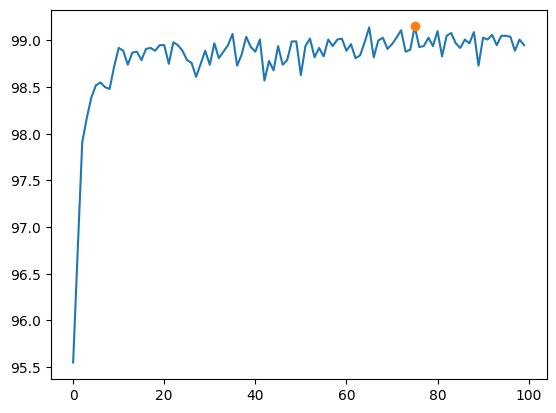

In [9]:
model, max_accuracy = train(100, device=device) # type: ignore

In [10]:
from datetime import datetime
ts = datetime.now().strftime('%Y%m%d%H%M%S')

torch.save(model.state_dict(), f'model_{ts}_{max_accuracy:0.3f}.pth')

In [11]:
# model = create_model().to(device)
# model.load_state_dict(torch.load("model.pth"))
# model.eval()

FileNotFoundError: [Errno 2] No such file or directory: 'model.pth'

In [ ]:
def predict_dl(model, data):
    y_pred = []
    y_true = []
    for images, labels in data:
        
        images = images.to(device)
        labels = labels.to(device)
        
        x = model(images)
        _, pred = torch.max(x, 1)
        pred = pred.data.cpu()
        y_pred.extend(list(pred.numpy()))
        y_true.extend(list(labels.numpy()))
    return np.array(y_pred), np.array(y_true)

In [ ]:
y_pred, y_true = predict_dl(model, val_dl)
pd.DataFrame(confusion_matrix(y_true, y_pred, labels=np.arange(0,10)))

,0,1,2,3,4,5,6,7,8,9
0,977,1,0,0,0,0,0,0,1,1
1,0,1134,0,0,0,0,0,1,0,0
2,0,0,1022,0,1,0,0,7,2,0
3,0,0,0,1003,0,3,0,1,0,3
4,0,0,0,0,978,0,2,0,1,1
5,2,0,0,6,0,883,1,0,0,0
6,4,3,0,1,1,3,945,0,1,0
7,0,4,1,0,0,0,0,1021,1,1
8,2,0,2,1,0,3,1,1,962,2
9,0,1,0,1,7,4,0,2,1,993


In [ ]:
from torchsummary import summary

# Move the model to a device (CPU or GPU)
model.to(device)

# Print the model summary
summary(model, (1, 28, 28)) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              ReLU-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              ReLU-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 120]          48,120
              ReLU-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             ReLU-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
---------------------------------

In [12]:
from torchviz import make_dot

# Create a dummy input
dummy_input = torch.randn(1, 1, 28, 28).to(device)

# Visualize the model
dot = make_dot(model(dummy_input), params=dict(model.named_parameters()))
dot.render("model_visualization", format="png", cleanup=True)

'model_visualization.png'

In [26]:
print(model[0])

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))


In [208]:
def conv_max_layer_plot(title, image, figsize=(5, 5), color='viridis'):
    fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor="black")
    fig.suptitle(title, color="white", y=0.85)

    image_plot = ax.imshow(image[0], cmap=color)
    ax.axis('off')
    
    cbar = fig.colorbar(image_plot, ax=ax, shrink=0.8)
    cbar.ax.yaxis.set_tick_params(color='white')
    cbar.outline.set_edgecolor('white') # type: ignore
    for tick in cbar.ax.yaxis.get_ticklabels():
        tick.set_color('white')
    plt.show()
    
def fdl_layer_plot(image, title, figsize=(5, 3), color='viridis'):
    fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor="black")
    fig.suptitle(title, color="white", y=1)

    image_plot = ax.imshow(image.reshape(1, -1), cmap=color, aspect='auto')  # Reshape for imshow and set aspect
    
    cbar = fig.colorbar(image_plot, ax=ax, shrink=0.8)
    cbar.ax.yaxis.set_tick_params(color='white')
    cbar.outline.set_edgecolor('white')  # type: ignore
    for tick in cbar.ax.yaxis.get_ticklabels():
        tick.set_color('white')
    
    ax.axis('off')  # Turn off axis
    
    plt.show()

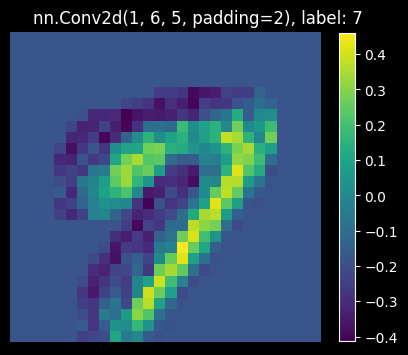

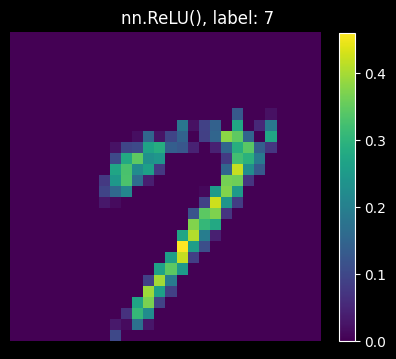

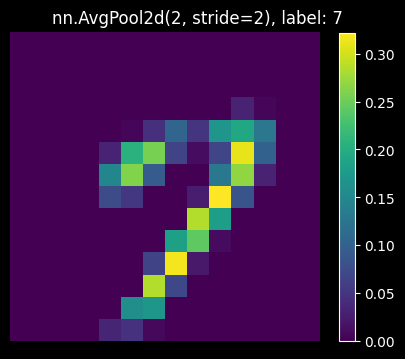

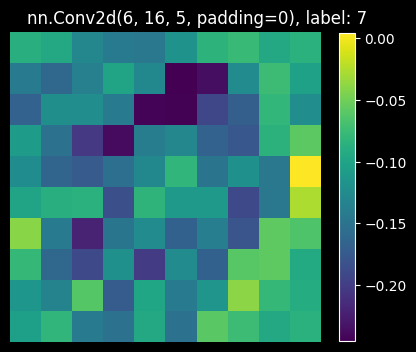

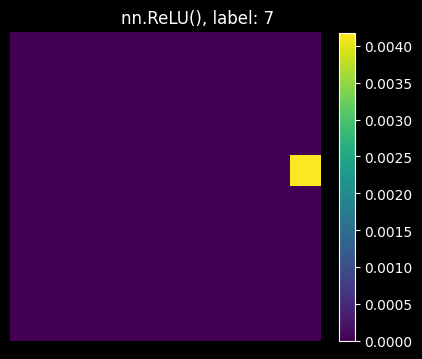

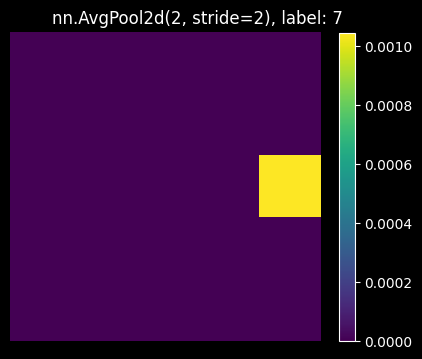

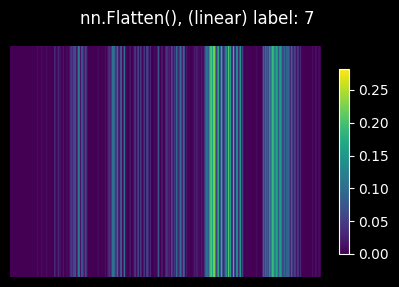

In [225]:
image, label = train_data[15]
image = image.to(device)
# Get the output of the first convolutional layer
conv_output_1 = model[0](image)
# Rearrange dimensions and convert to numpy array
conv_output_image_1 = conv_output_1.permute(0, 1, 2).detach().numpy()

relu_output_1= model[1](conv_output_1)
relu_output_image_1 = relu_output_1.permute(0, 1, 2).detach().numpy()

avg_pool_output_1= model[2](relu_output_1)
avg_pool_output_image_1 = avg_pool_output_1.permute(0, 1, 2).detach().numpy()

conv_output_2= model[3](avg_pool_output_1)
conv_output_image_2 = conv_output_2.permute(0, 1, 2).detach().numpy()

relu_output_2= model[4](conv_output_2)
relu_output_image_2 = relu_output_2.permute(0, 1, 2).detach().numpy()

avg_pool_output_2= model[5](relu_output_2)
avg_pool_output_image_2 = avg_pool_output_2.permute(0, 1, 2).detach().numpy()

flatten_1 = model[6](avg_pool_output_2)
flatten_image_1 = avg_pool_output_2.detach().numpy()

# RuntimeError: mat1 and mat2 shapes cannot be multiplied (16x25 and 400x120)
#linear_1 = model[7](flatten_1)


conv_max_layer_plot(title=f'nn.Conv2d(1, 6, 5, padding=2), label: {label}',image=conv_output_image_1)
conv_max_layer_plot(title=f'nn.ReLU(), label: {label}',image=relu_output_image_1)
conv_max_layer_plot(title=f'nn.AvgPool2d(2, stride=2), label: {label}',image=avg_pool_output_image_1)
conv_max_layer_plot(title=f'nn.Conv2d(6, 16, 5, padding=0), label: {label}',image=conv_output_image_2)
conv_max_layer_plot(title=f'nn.ReLU(), label: {label}',image=relu_output_image_2)
conv_max_layer_plot(title=f'nn.AvgPool2d(2, stride=2), label: {label}',image=avg_pool_output_image_2)
fdl_layer_plot(title=f'nn.Flatten(), (linear) label: {label}',image=flatten_image_1)
# fdl_layer_plot(title=f'nn.Linear(400, 120), label: {label}',image=output_image)
